In [2]:
import numpy as np
import matplotlib.pyplot as plt

(100,)
(100,)


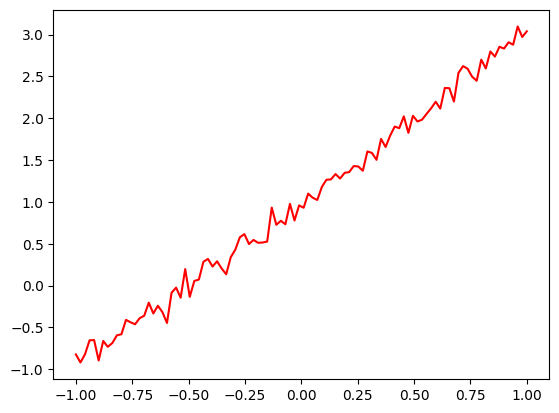

In [17]:
# Generate some data: y = 2x + 1 with some noise
np.random.seed(0)
x = np.linspace(-1, 1, 100)
y = 2 * x + 1 + np.random.normal(0, 0.1, x.shape)
print(x.shape)
print(y.shape)

plt.plot(x, y, color='red', label="Noisy function")

In [22]:
# Initialize parameters randomly (weight and bias)
weight = np.random.randn()
bias = np.random.randn()
print(weight, bias)

# Hyperparameters
learning_rate = 0.01
epochs = 120

1.9229420264803847 1.4805147914344243


In [ ]:
# Define the simple linear model (y_pred = weight*x+bias)
def forward_pass(x, weight, bias):
    return weight*x+bias

In [ ]:
def update():
    global weight, bias, x, y, learning_rate

    # Forward pass: Calculate predicted values using current weight and bias
    y_pred = forward_pass(x,weight,bias)

    
